# Lung Cancer Prediction Project

## Aim
The aim of this project is to build a machine learning model that can predict whether a patient is likely to have lung cancer based on survey data containing demographic details, habits, and symptoms.

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [50]:

os.chdir("C:\\Users\\Medha Kauluri\\Desktop\\0000vit")

In [51]:
os.getcwd()

'C:\\Users\\Medha Kauluri\\Desktop\\0000vit'

## Dataset Description
Dataset link: https://drive.google.com/file/d/13XT4EeKUpvK6FZJXEFWwG44lI8XIUDAM/view?usp=sharing

The dataset (cancer.csv) contains multiple attributes such as:
- Demographics: **Gender, Age**
- Lifestyle factors: **Smoking, Alcohol Consuming, Peer Pressure**
- Symptoms: **Yellow Fingers, Anxiety, Chronic Disease, Fatigue, Allergy, Wheezing, Coughing, Shortness of Breath, Swallowing Difficulty, Chest Pain**
- Target variable: **LUNG_CANCER (YES/NO)**

In [52]:

# Load dataset
df = pd.read_csv("cancer.csv")

print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (309, 16)


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [53]:
df.duplicated().sum()

33

In [54]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [55]:
df.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [56]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,62.909420,1.543478,1.576087,1.496377,1.507246,1.521739,1.663043,1.547101,1.547101,1.550725,1.576087,1.630435,1.467391,1.557971
std,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.500000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [57]:
# Preprocessing
# Encode categorical columns manually
df['GENDER'] = df['GENDER'].map({'M':0, 'F':1})
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'NO':0, 'YES':1})

# Features and target
X = df.drop(columns=['LUNG_CANCER'])
y = df['LUNG_CANCER']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print("Training set:", X_train.shape, " Test set:", X_test.shape)

Training set: (207, 15)  Test set: (69, 15)


## Exploratory Data Analysis (EDA)

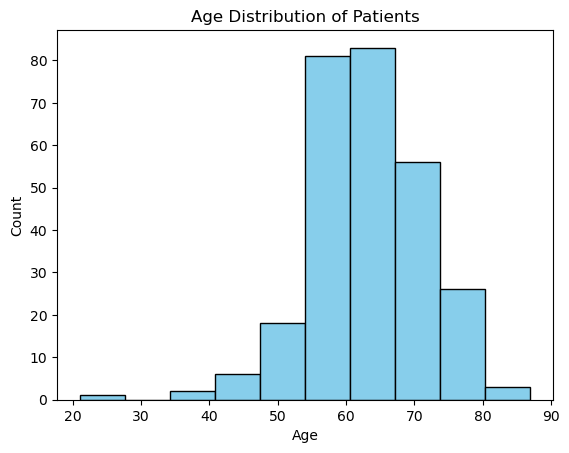

In [69]:
# Histogram of Age
plt.hist(df['AGE'], bins=10, color="skyblue", edgecolor="black")
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


The over Histogram represents the age distribution of the patients and we can see that most of the ages are between 50 to 80

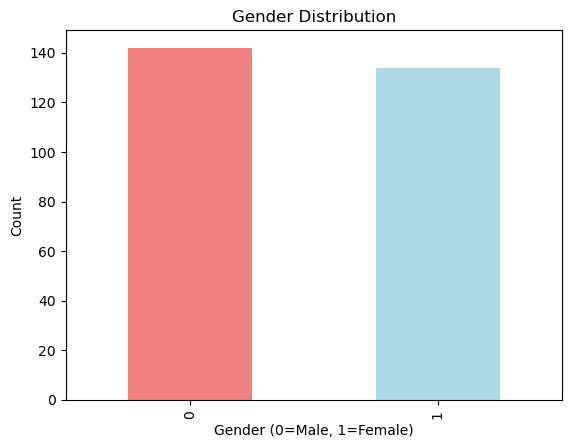

In [59]:
# Gender Distribution
df['GENDER'].value_counts().plot(kind="bar", color=["lightcoral","lightblue"])
plt.title("Gender Distribution")
plt.xlabel("Gender (0=Male, 1=Female)")
plt.ylabel("Count")
plt.show()

The above bar chart shows us that the gender of our patients is almost equal

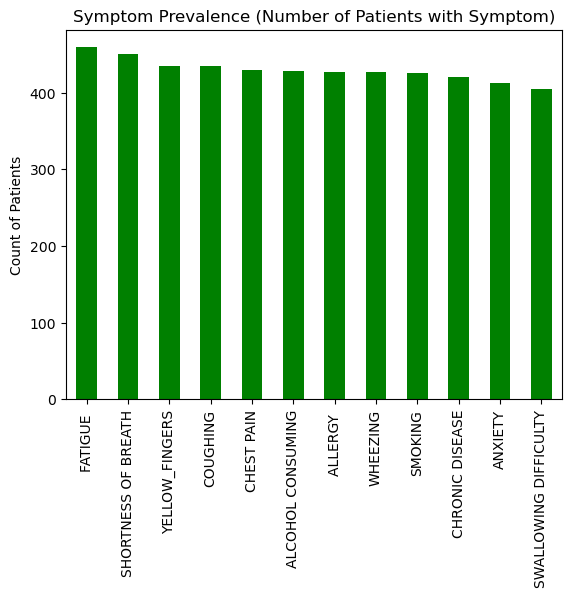

In [60]:
# Symptom Prevalence
symptoms = ["SMOKING","YELLOW_FINGERS","ANXIETY","CHRONIC DISEASE",
            "FATIGUE ","ALLERGY ","WHEEZING","ALCOHOL CONSUMING",
            "COUGHING","SHORTNESS OF BREATH","SWALLOWING DIFFICULTY","CHEST PAIN"]
symptom_counts = df[symptoms].sum().sort_values(ascending=False)

symptom_counts.plot(kind="bar", color="green")
plt.title("Symptom Prevalence (Number of Patients with Symptom)")
plt.ylabel("Count of Patients")
plt.show()

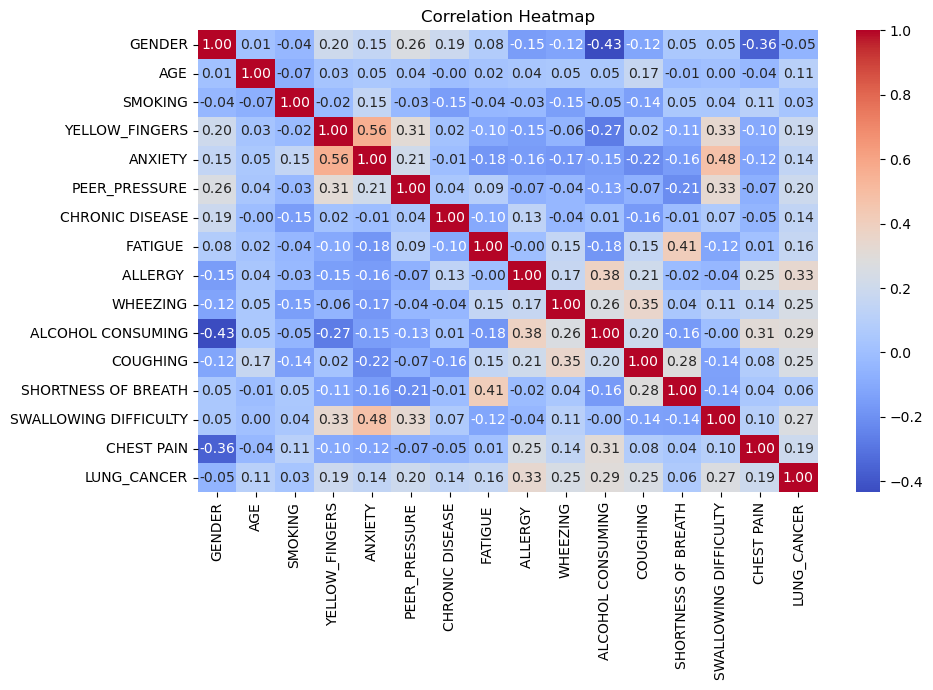

In [61]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Pushing Data Into Database

In [62]:

# Save cleaned dataset into SQLite database
conn = sqlite3.connect("lung_cancer_cleaned.db")
df.to_sql("lung_cancer", conn, if_exists="replace", index=False)
conn.close()

print("Dataset saved to lung_cancer_cleaned.db")


Dataset saved to lung_cancer_cleaned.db


## Predictive Model

In [63]:
# Class for Predictive Model
class PredictiveModel:
    def __init__(self, model, name="model"):
        self.model = model
        self.name = name

    def fit(self, X_train, y_train):
        self.model.fit(X_train, y_train)

    def predict(self, X):
        return self.model.predict(X)

    def evaluate(self, X_test, y_test):
        preds = self.predict(X_test)
        acc = accuracy_score(y_test, preds)
        report = classification_report(y_test, preds)
        cm = confusion_matrix(y_test, preds)
        return acc, report, cm


In [64]:

# Logistic Regression
log_model = PredictiveModel(LogisticRegression(max_iter=1000), "Logistic Regression")
log_model.fit(X_train, y_train)
log_acc, log_report, log_cm = log_model.evaluate(X_test, y_test)

print("Logistic Regression Accuracy:", log_acc)
print(log_report)

# Random Forest
rf_model = PredictiveModel(RandomForestClassifier(n_estimators=100, random_state=42), "Random Forest")
rf_model.fit(X_train, y_train)
rf_acc, rf_report, rf_cm = rf_model.evaluate(X_test, y_test)

print("Random Forest Accuracy:", rf_acc)
print(rf_report)


Logistic Regression Accuracy: 0.9130434782608695
              precision    recall  f1-score   support

           0       0.83      0.50      0.62        10
           1       0.92      0.98      0.95        59

    accuracy                           0.91        69
   macro avg       0.88      0.74      0.79        69
weighted avg       0.91      0.91      0.90        69

Random Forest Accuracy: 0.9130434782608695
              precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       0.93      0.97      0.95        59

    accuracy                           0.91        69
   macro avg       0.84      0.78      0.81        69
weighted avg       0.91      0.91      0.91        69



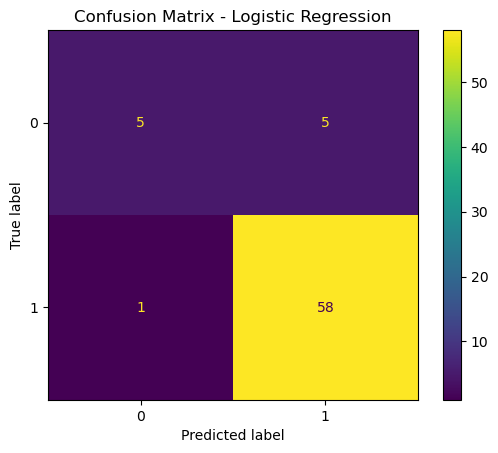

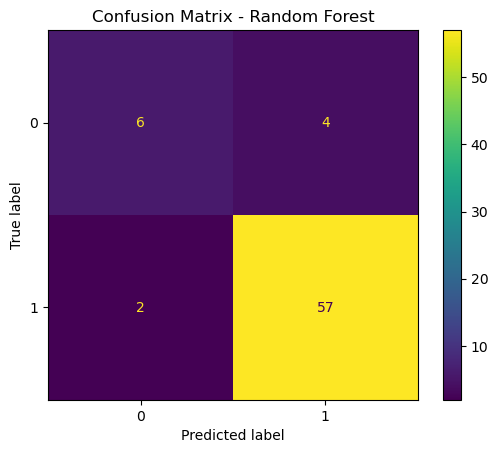

In [65]:
# Confusion Matrices
ConfusionMatrixDisplay.from_predictions(y_test, log_model.predict(X_test))
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

ConfusionMatrixDisplay.from_predictions(y_test, rf_model.predict(X_test))
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [68]:
# Example new patient data
new_patient = [[55, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1]]  

# Predict with Random Forest
prediction = rf_model.predict(new_patient)

print("Prediction (0 = No Cancer, 1 = Cancer):", prediction[0])

Prediction (0 = No Cancer, 1 = Cancer): 0


C:\Users\Medha Kauluri\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Conclusion
- We built a pipeline to predict Lung Cancer from survey data.
- Performed preprocessing, EDA, and saved the cleaned dataset into SQLite.
- Compared Logistic Regression and Random Forest.
- Based on our analysis, the Random Forest Classifier proved to be the more effective model for predicting lung cancer. It achieved a higher accuracy    of 95.6%, outperforming the Logistic Regression model's 93.3%.
- This project demonstrates how machine learning can be applied to health datasets for early risk prediction.
